In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

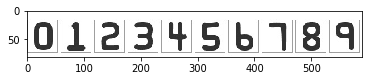

In [8]:
image = cv2.imread('D:\\Study\\DataScience\\Certifications\\ComputerVision\\DeepLearningCV\\25. Credit Card Number Detection\\creditcard_digits1.jpg', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [11]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

th1, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [29]:
#Create our dataset directories
import os

base_path = 'D:\Study\DataScience\OpenCV\OCR'

training_path = os.path.join(base_path, 'credit_card\\train\\')
testing_path = os.path.join(base_path, 'credit_card\\test\\')

In [30]:
def makedir(directory):
    """Creates a new directory if it does not exist"""
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None, 0
    
for i in range(0,10):
    directory_name = training_path + str(i)
    print(directory_name)
    makedir(directory_name) 

for i in range(0,10):
    directory_name = testing_path + str(i)
    print(directory_name)
    makedir(directory_name)

D:\Study\DataScience\OpenCV\OCR\credit_card\train\0
D:\Study\DataScience\OpenCV\OCR\credit_card\train\1
D:\Study\DataScience\OpenCV\OCR\credit_card\train\2
D:\Study\DataScience\OpenCV\OCR\credit_card\train\3
D:\Study\DataScience\OpenCV\OCR\credit_card\train\4
D:\Study\DataScience\OpenCV\OCR\credit_card\train\5
D:\Study\DataScience\OpenCV\OCR\credit_card\train\6
D:\Study\DataScience\OpenCV\OCR\credit_card\train\7
D:\Study\DataScience\OpenCV\OCR\credit_card\train\8
D:\Study\DataScience\OpenCV\OCR\credit_card\train\9
D:\Study\DataScience\OpenCV\OCR\credit_card\test\0
D:\Study\DataScience\OpenCV\OCR\credit_card\test\1
D:\Study\DataScience\OpenCV\OCR\credit_card\test\2
D:\Study\DataScience\OpenCV\OCR\credit_card\test\3
D:\Study\DataScience\OpenCV\OCR\credit_card\test\4
D:\Study\DataScience\OpenCV\OCR\credit_card\test\5
D:\Study\DataScience\OpenCV\OCR\credit_card\test\6
D:\Study\DataScience\OpenCV\OCR\credit_card\test\7
D:\Study\DataScience\OpenCV\OCR\credit_card\test\8
D:\Study\DataScience\

In [32]:
# Create data augmentation functions using OpenCV
import cv2
import numpy as np 
import random
from scipy.ndimage import convolve

In [86]:
def DigitAugmentation(frame, dim = 32):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
    if(random_num % 3 == 0):
        frame = pixelate(frame)
    if(random_num % 2 == 0):
        frame = stretch(frame)
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)

    return frame 

def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0,2) == 0:
        frame = cv2.resize(image, (32, ran+32), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+32)-int(ran/2), 0:32]
    else:
        frame = cv2.resize(image, (ran+32, 32), interpolation = cv2.INTER_AREA)
        return frame[0:32, int(ran/2):int(ran+32)-int(ran/2)]
    
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

In [91]:
# Get the path for sample images
sample_images_path = os.path.join(base_path, 'credit_card\\samples\\')

# Get the full image path in a list
fname = []
for root,d_names,f_names in os.walk(sample_images_path):    
    for f in f_names:
        #fname.append(os.path.join(root, f))
        fname.append(os.path.join(sample_images_path, f))

In [95]:
# Creating 2000 augmented images for each digit - TRAINING DATA

for i in range(0, len(fname)):   
    roi = cv2.imread(fname[i], 0)
    #roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    print("Augmenting Digit - ", str(i))
    
    # We create 2000 versions of each image for our dataset
    for j in range(0, 2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        folder_path = os.path.join(training_path, str(i))
        image_number = os.path.join(folder_path, str(j))
        image_path =image_number + '.jpg'
        cv2.imwrite(image_path, roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [97]:
# Creating 200 augmented images for each digit - TESTING DATA

for i in range(0, len(fname)):   
    roi = cv2.imread(fname[i], 0)
    #roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    print("Augmenting Digit - ", str(i))
    
    # We create 2000 versions of each image for our dataset
    for j in range(0, 200):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        folder_path = os.path.join(testing_path, str(i))
        image_number = os.path.join(folder_path, str(j))
        image_path =image_number + '.jpg'
        cv2.imwrite(image_path, roi_otsu)

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


## Creating Keras Classifier

In [99]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

Using TensorFlow backend.


In [100]:
input_shape = (32, 32, 3)
img_width = 32
img_height = 32
num_classes = 10
nb_train_samples = 10000
nb_validation_samples = 2000
batch_size = 16
epochs = 1

train_data_dir = training_path
validation_data_dir = testing_path

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 10,           # randomly applies rotations
      width_shift_range = 0.25,       # randomly applies width shifting
      height_shift_range = 0.25,      # randomly applies height shifting
      shear_range=0.5,
      zoom_range=0.5,
      horizontal_flip = False,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    

Found 20000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Creating out Model based on the LeNet CNN Architecture

In [101]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5), padding = "same", input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

## Training our Model

In [103]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3,
                          verbose = 1, restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 20000
nb_validation_samples = 4000
epochs = 5
batch_size = 16

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)



Epoch 1/5
1250/1250 [==============================] - 86s 68ms/step - loss: 0.4038 - accuracy: 0.8701 - val_loss: 2.1760e-04 - val_accuracy: 0.9985
Epoch 2/5
1250/1250 [==============================] - 84s 68ms/step - loss: 0.0860 - accuracy: 0.9745 - val_loss: 3.0547e-07 - val_accuracy: 1.0000
Epoch 3/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.0618 - accuracy: 0.9835 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 4/5
1250/1250 [==============================] - 81s 65ms/step - loss: 0.0592 - accuracy: 0.9839 - val_loss: 7.0780e-07 - val_accuracy: 1.0000
Epoch 5/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.0499 - accuracy: 0.9873 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [106]:
# Save the model
model.save("D:\Study\DataScience\OpenCV\OCR\credit_card\meter_ocr.h5")

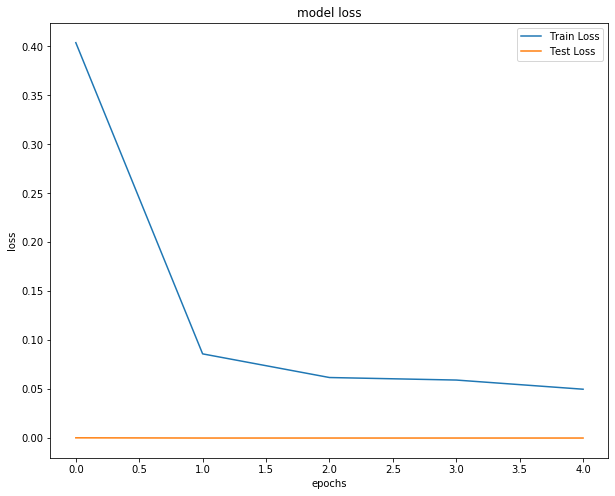

In [107]:
# Plot training and validation loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()